### imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
## checking the accuracy of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [4]:
data = pd.read_csv('./Datas/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
## remove the noise data 
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in non_zero:
    ## replace the noises with NaN and replace it with mean of the data points
    data[column] = data[column].replace(0, np.NaN)
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN, mean)
    print(data[column])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


### Finding the dependent and independent variables

In [7]:
X = data.iloc[:,0:8]
Y = data.iloc[:,8]
## training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Feature scaling

In [8]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
print(Y_test)

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


In [9]:
## find the square root
import math
math.sqrt(len(Y_test))

12.409673645990857

In [10]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
## to check the accuracy of the prediction we need to run it through confusion matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[95, 12],
       [16, 31]])

In [13]:
print(f1_score(Y_test, y_pred))

0.6888888888888888


In [14]:
print(accuracy_score(Y_test,y_pred))

0.8181818181818182


/home/ananthan2k/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ananthan2k/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


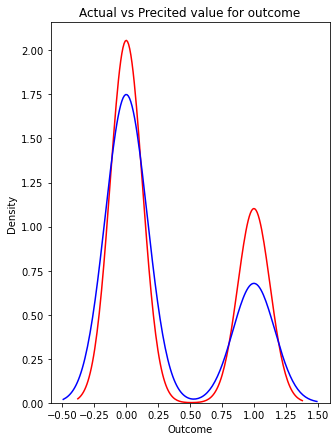

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

### Partitioning and K-fold Cross Validation

In [48]:
from sklearn.model_selection import KFold
X.iloc[155, : ]

Pregnancies                   7.000
Glucose                     152.000
BloodPressure                88.000
SkinThickness                44.000
Insulin                     155.000
BMI                          50.000
DiabetesPedigreeFunction      0.337
Age                          36.000
Name: 155, dtype: float64

In [41]:
kf = KFold(n_splits=5, random_state=None) 
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
def score_Fold(X_train, Y_train, X_test, Y_test):
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    return f1_score(Y_test, y_pred)
    

In [57]:
print(kf)
## score listing
score_list1 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    score_list1.append(score_Fold(X_train, Y_train, X_test, Y_test))

print("Performance metric mean:", np.mean(score_list1))

KFold(n_splits=5, random_state=None, shuffle=False)
Performance metric mean: 0.6171373467483425


#### Stratified K-fold CV

In [59]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)

score_list2 = []
for train_index, test_index in skf.split(X,Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    score_list2.append(score_Fold(X_train, Y_train, X_test, Y_test))
    
print("Performance metric mean:", np.mean(score_list2))

Performance metric mean: 0.6119185605177115


#### Repeated K-fold CV

In [62]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

score_list3 = []
for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    score_list3.append(score_Fold(X_train, Y_train, X_test, Y_test))

print("Performance metric mean:", np.mean(score_list3))
    

Performance metric mean: 0.6010620471774705


/home/ananthan2k/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ananthan2k/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ananthan2k/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

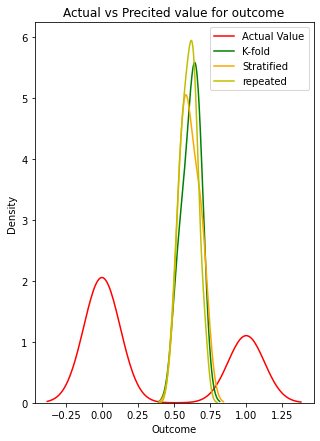

In [68]:
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
#sns.distplot(y_pred, hist=False, color="b", label="Predicted(No k-fold)", ax=ax)
sns.distplot(score_list1, hist=False, color="g", label="K-fold", ax=ax)
sns.distplot(score_list2, hist=False, color="orange", label="Stratified", ax=ax)
sns.distplot(score_list3, hist=False, color="y", label="repeated", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.legend()
plt.show()
plt.close()

#### ROC curve for different K values

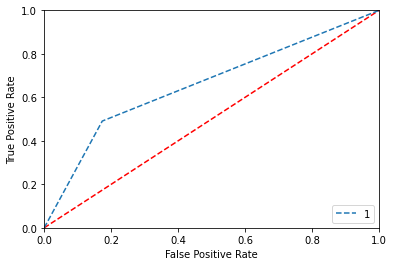

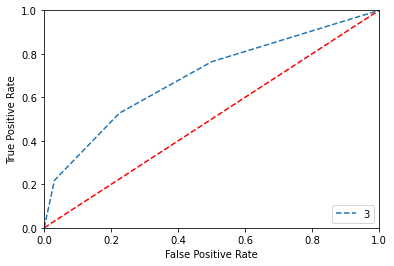

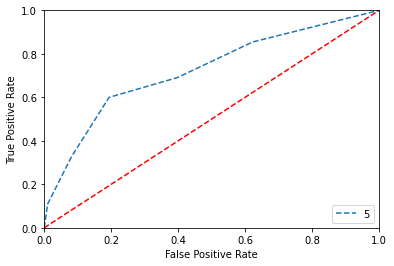

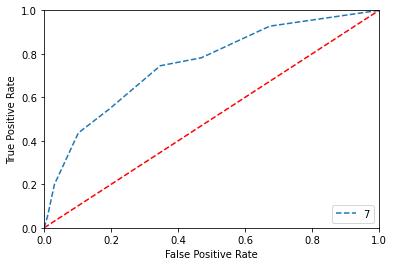

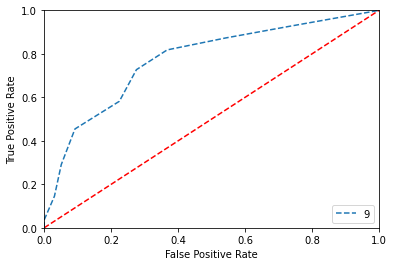

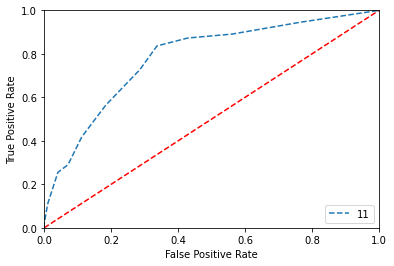

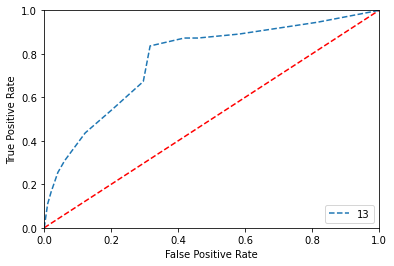

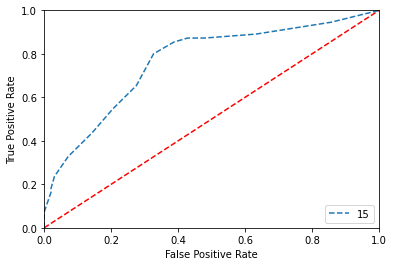

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

K = [1,3,5,7,9,11,13,15]
for k in K:
    classifier = KNeighborsClassifier(n_neighbors=k,p=2,metric='euclidean')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(Y_test, y_pred[:, 1])
    roc_auc= roc_auc_score(Y_test, y_pred[:,1])
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot(fpr, tpr, linestyle='--',  label = '%d' %k)
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
k = 11 had the best performance